## House Price Predictions

## Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link]:(https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

Before downloading the dataset, let's import the libraries we are going to need for the project.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Next we'll download the data using `wget` command shown above.

In [2]:
if not os.path.isfile('housing.csv'):
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

## EDA

The dataset is saved by the name `housing.csv`, we can read it in pandas dataframe.

In [3]:
# Load the data
df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Check the number of rows and columns:

In [4]:
df.shape

(20640, 10)

The dataframe consists of 20640 rows and 10 columns. Let's find out the data types of features in the data.

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

All the columns are numeric except `ocean_proximity`. We should look at the column `median_house_value` and see if it has a long tail.

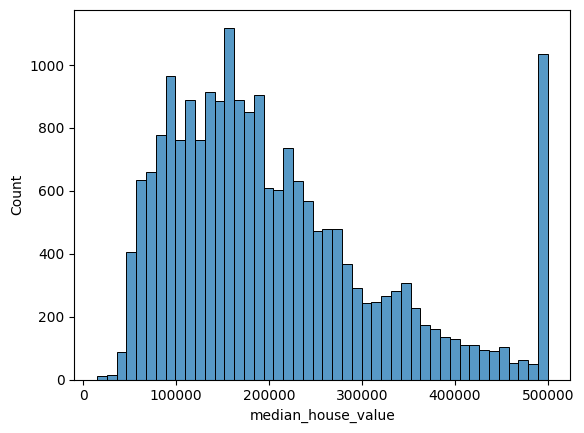

In [6]:
sns.histplot(df.median_house_value)
plt.show();

The distribution is not normal in `median_house_value`, rather it is a long-tail distribution.

## Features

For the rest of the homework, we'll need to use only these columns:

- `latitude`
- `longitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `median_house_value`

Since we are not going to need `ocean_proximity` column, it is safe to drop the column using `df.drop()` function.

In [7]:
# Drop 'ocean_proximity' columns
df = df.drop(columns='ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1

Find a feature with missing values. How many missing values does it have?

In [8]:
# Find columns with missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

There are 207 missing values in the feature `total_bedrooms`.

## Question 2

What's the median (50% percentile) for variable `population`?

In [9]:
df['population'].median()

1166.0

The median value of `population` is 1166.

### Split the Data

- Shuffle the initial dataset, use seed `42`
- Split the data into train/val/test sets, with 60%/20%/20% distribution
- Make sure that the target value (`median_house_value`) is not in the dataframe
- Apply the log transformation to the `median_house_value` using `np.log1p()` function.

Set random seed.

In [10]:
# Set the random seed 42
np.random.seed(42)

# Create an array 'idx' that has equal num of rows as in 'df'
idx = np.arange(df.shape[0])

# Shuffle the index
np.random.shuffle(idx)

Set the ration for train/val/test datasets.

In [11]:
# Set the ratio of train/val/test datasets
n = len(df)

val_ratio = int(n * 0.2)
test_ratio = int(n * 0.2)
train_ratio = n - val_ratio - test_ratio

In [12]:
# Split and shuffle the data into train/val/test sets
df_train = df.iloc[idx[:train_ratio]]
df_val = df.iloc[idx[train_ratio:train_ratio+val_ratio]]
df_test = df.iloc[idx[train_ratio+val_ratio:]]

Split and shuffle the data

In [13]:
# Reset the indexes of train/val/test sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Create target variable for train/val/test.

In [14]:
# Create target variable 'y' for train/val/test
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [15]:
# Delete the target variable 'median_house_value'
# from train/val/test sets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Apply log transformation on target varaible.

In [16]:
# Apply log transformation to 'median_house_value'
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

## Question 3

- We need to deal with missing values for the column from Q1 (`total_bedrooms`) 
- We have two option: fill it with 0 or with the mean of the variable `total_bedrooms`
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only! (val and test data don't have missing values)
- Use the validation dataset to evaluate the models and compare the RMSE of each options.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

For data preprocessing, We'll create a function `prepare_X` that takes a dataframe and an optional parameter `fillna_value` and performs following tasks:

- Make the copy of the dataframe
- If `fillna_value` is provided, it will only manipulate `df_train` data for:
    - Fill missing values with 0 when `fillna_value=0` and convert "df_train" to the numpy feature matrix "X"
    - Fill missing values with mean when `fillna_value='mean'` and convert "df_train" to the numpy feature matrix "X"
- If `fillna_value` is not provided then simply convert dataframe (`val` or `test`) to numpy feature matrix "X"

In [17]:
def prepare_X(df, fillna_value=None):
    df = df.copy()
    if fillna_value == 0:
        df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
        X = df.values
    elif fillna_value == 'mean':
        col_mean = df['total_bedrooms'].mean()
        df['total_bedrooms'] = df['total_bedrooms'].fillna(col_mean)
        X = df.values
    else:
        X = df.values
    return X

We have the `prepare_X()` function for creating feature matrix to training. Let's start by fillna with 0 and train the model.

In [18]:
# Create feature matrix 'X_train_zero' by filling missing values
# with 0
X_train_zero = prepare_X(df_train, fillna_value=0)

Let's confirm that `X_train_zero` has no missing values.

In [19]:
# Check if there is any missing values
np.isnan(X_train_zero).any()

False

Next, we'll create another feature matrix for training `X_train_mean` and fill the missing values of column `total_bedrooms` with mean.

In [20]:
# Create feature matrix 'X_train_mean' by filling missing values
# with the mean
X_train_mean = prepare_X(df_train, fillna_value='mean')

In [21]:
# Check if there is any missing value in 'X_train_mean'
np.isnan(X_train_mean).any()

False

We have successfully fill missing values with 0 and mean. Next we'll create function `train_linear_regression()` that takes feature matrix and target vector from train dataset and perform the following steps:

- Create a vector of all ones that has equal number of rows in feature matrix
- Add the column vector of all ones (bias) with the feature matrix
- Calculate the *Gram matrix* (dot product of a matrix with its own transpose)
- Compute the inverse of Gram matrix
- Find the weights by taking the dot product of `inverse of Grame matrix` with `transpose of feature matrix` and their dot product with the `target vector`.
- Return the bias and weights

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

We have our training function. Now, we'll train the model using `X_train_zero` and `X_train_mean`.

In [23]:
# Train the model using `X_train_zero`
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Train the model using `X_train_mean`
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

The models have been trained. We now prepare `X_val` for making predictions.

In [24]:
# Create 'X_val' feature matrix
X_val = prepare_X(df_val)

Make predictions on the `X_val` using our trained models.

In [25]:
# Make predictions on 'X_val'
# using model trained on 'X_train_zero'
y_pred_zero = w0_zero + X_val.dot(w_zero)

# Make predictions on 'X_val'
# using model trained on 'X_train_mean'
y_pred_mean = w0_mean + X_val.dot(w_mean)

To evaluate the models performance we'll create a function `rmse()` that will take target vector `y` and predictions `y_pred` and do the following:

- Calculate the difference (error)
- Calculate the square of the error
- Compute the mean of the squared error
- return the root mean squared error

In [26]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

Let's evaluate the models using `rmse()` function.

In [27]:
# Calculate RMSE on X_train_zero
score_zero = rmse(y_val, y_pred_zero)
round(score_zero, 2)

0.33

In [28]:
# Calculate RMSE on X_train_mean
score_mean = rmse(y_val, y_pred_mean)
round(score_mean, 2)

0.33

As we can see there is no significant difference between the performance of both models. Whether we replace the missing values the 0 or with the mean, the evaluation score is similar.

## Question 4

- Now let's train a regularized linear regression
- For this question, fill the NAs with 0
- Try different values of `r` from the list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`
- Use RMSE to evaluate the model on the validation dataset
- Round the RMSE scores to 2 decimal digits
- Which `r` gives the best RMSE?

Options:

- 0
- 0.000001
- 0.001
- 0.0001

We'll have to modify the `train_linear_regression()` function that accepts regularizer as a parameter. Which means we'll add a following step in our training function:

- Create an identity matrix equals to the number of rows of Gram matrix, which then be multiplied by the regularizer `r` and added back to the Gram matrix

In [29]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

We will train our model using `X_train_zero`, `y_train`, and a list of values of `r` to find the optimal value.

In [30]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_score = []

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    rmse_score.append(score)

In [31]:
# Store 'r' and 'rmse_score' in a dataframe for comparison
df_rmse = pd.DataFrame({'r': r_values, 'rmse': rmse_score})
df_rmse['rounded_rmse'] = round(df_rmse['rmse'], 2)
df_rmse

,r,rmse,rounded_rmse
0,0.000000,0.329533,0.33
1,0.000001,0.329533,0.33
2,0.000100,0.329533,0.33
3,0.001000,0.329533,0.33
4,0.010000,0.329532,0.33
5,0.100000,0.329695,0.33
6,1.000000,0.333789,0.33
7,5.000000,0.339249,0.34
8,10.000000,0.340606,0.34


From the given options both `0.0001` and `0.001` have the same score but we'll consider the smallest value of `r`. Therefore, we'll go with `r=0.0001` is the best option.

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- For each seed, do the train/val/test split with 60%/20%/20% distribution
- Fill the missing values with 0 and train a model without regularization
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores
- What's the standard deviation of the all scores? To compute the standard deviation, use `np.std`
- Round the results to 3 decimal digits `round(std, 3)`

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

- 0.16
- 0.00005
- 0.005
- 0.15555

To implement the steps above we'll create an empty dictionary `seed_dict` to store seed numbers and their `rmse` scores respectively. Then, we'll loop over the list of `seeds` and perform the task we have done previously, such as:

- Split and shuffle the data for train/validation/test sets
- Create target vectors and apply log transformation
- Train the model and make predictions on validation
- Evaluate the model on validation

In [32]:
# Number of rows in 'df'
n = df.shape[0]
# Create an array of 'n' rows
idx = np.arange(n)

# List of seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Seed dict of store 'rmse score'
seed_dict = {seed: {} for seed in seeds}

for s in seeds:
    
    # Set random seed
    np.random.seed(s)
    # Shuffle index
    np.random.shuffle(idx)
    
    # Split and shuffle the data
    df_train = df.iloc[idx[:train_ratio]]
    df_val = df.iloc[idx[train_ratio:train_ratio+val_ratio]]
    df_test = df.iloc[idx[train_ratio+val_ratio:]]
    
    # Reset the indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Create target variable 'y'
    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values
    
    # Apply log transformation to 'median_house_value'
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)
    
    # Drop the target columns from features
    df_train.drop(columns='median_house_value', axis=1, inplace=True)
    df_val.drop(columns='median_house_value', axis=1, inplace=True)
    df_test.drop(columns='median_house_value', axis=1, inplace=True)

    
    # Prepare Feature matrix and fill missing values with 0
    # Only transform train and validation data
    X_train_zero = prepare_X(df_train, fillna_value=0)
    X_val_zero = prepare_X(df_val, fillna_value=0)
    
    # Train the model
    w0, w = train_linear_regression(X_train_zero, y_train)
    
    # Make predictions
    y_pred = w0 + X_val_zero.dot(w)
    
    # Compute RMSE
    score = rmse(y_val, y_pred)
    
    # Store result in 'seed_dict' 
    seed_dict[s]['rmse'] = score

In [33]:
# View 'seed_dict'
seed_dict

{0: {'rmse': 0.33884304805314536},
 1: {'rmse': 0.3390390788700666},
 2: {'rmse': 0.34923218040151777},
 3: {'rmse': 0.341929799382054},
 4: {'rmse': 0.348157863364355},
 5: {'rmse': 0.3443996643813247},
 6: {'rmse': 0.34905238454673737},
 7: {'rmse': 0.340023314731451},
 8: {'rmse': 0.34127013234812786},
 9: {'rmse': 0.33794861201431936}}

The `seed_dict` is a dictionary of multiple dictionaries, whereas, we are only interested in rmse score. We'll loop through the `seed_dict` and extract rmse values.

In [34]:
# Extract rmse score from 'seed_dict' and
# store into the list 'rmse_list'
rmse_list = []
for v in seed_dict.values():
    for score in v.values():
        rmse_list.append(score)

rmse_list

[0.33884304805314536,
 0.3390390788700666,
 0.34923218040151777,
 0.341929799382054,
 0.348157863364355,
 0.3443996643813247,
 0.34905238454673737,
 0.340023314731451,
 0.34127013234812786,
 0.33794861201431936]

We have the list of rmse score. Next, we'll find the standard deviation of `rmse_list` to see how close or far these values are:

In [35]:
# Calculate standard deviation
print(f'Standard deviation of RMSE: {round(np.std(rmse_list), 3)}')

Standard deviation of RMSE: 0.004


The stardard deviation of the validation rmse is `0.004`. Although this value doesn't match with our given options, we'll choose the best closest option, that is: `0.005`.

## Question 6

- Split the dataset like previously, use seed 9
- Combine train and validation datasets
- Fill the missing values with 0 and train a model with `r=0.001`
- What's the RMSE on the test dataset?

Options:

- 0.35
- 0.135
- 0.450
- 0.245

We'll implement steps that we have done before but we're making sure of two things:
- To use the random seed 9 for splitting the data
- To combine train and validation data for model training

In [36]:
# Set the ratio of train/val/test datasets
n = df.shape[0]

val_ratio = int(n * 0.2)
test_ratio = int(n * 0.2)
train_ratio = n - val_ratio - test_ratio

In [37]:
# Set the random seed 9
np.random.seed(9)

# Create an array 'idx' that has equal num of rows as in 'df'
idx = np.arange(df.shape[0])

# Shuffle the index
np.random.shuffle(idx)

In [38]:
# Split and shuffle the data into train/val/test sets
df_train = df.iloc[idx[:train_ratio]]
df_val = df.iloc[idx[train_ratio:train_ratio+val_ratio]]
df_test = df.iloc[idx[train_ratio+val_ratio:]]

# Reset the indexes of train/val/test sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
# Create target variable 'y' for train/val/test
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

# Apply log transformation to 'median_house_value'
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [40]:
# Drop the target columns from features
df_train.drop(columns='median_house_value', axis=1, inplace=True)
df_val.drop(columns='median_house_value', axis=1, inplace=True)
df_test.drop(columns='median_house_value', axis=1, inplace=True)

In [41]:
# Combine train and validation data
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563
...,...,...,...,...,...,...,...,...
16507,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550
16508,-118.54,34.27,28.0,2309.0,300.0,931.0,302.0,6.7415
16509,-118.13,33.93,34.0,2122.0,517.0,1578.0,488.0,3.1496
16510,-118.37,34.11,42.0,5518.0,979.0,1863.0,957.0,8.5842


In [42]:
# Check for missing values in 'df_full_train'
df_full_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64

In [43]:
# Check for missing values in 'df_test'
df_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        39
population             0
households             0
median_income          0
dtype: int64

In [44]:
# Prepare train and test data, also fill missing values with 0
X_full_train = prepare_X(df_full_train, fillna_value=0)
X_test = prepare_X(df_test, fillna_value=0)

In [45]:
# Combine target vectors 'y_train' and 'y_val'
y_full_train = np.concatenate([y_train, y_val])

In [46]:
# Train the model with regularization (r=0.001)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Make predictions on test data
y_pred = w0 + X_test.dot(w)

# Evaluate model on 'y_test'
score = rmse(y_test, y_pred)
print(f'Model rmse on test data: {round(score, 2)}')

Model rmse on test data: 0.35
